In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
coord = {
"initial_pose": [0.0, 18.0],
"goals": [0.0, -2.0],
"plants_row1": np.array([[4.06, 18.786],
                [4.1, 13.25],
                [3.74, 8.096],
                [3.61, 3.27],
                [3.73, -2.31],
                [3.85, -7.77],
                [3.35, -13.41],
                [3.97, -18.19]]),
"plants_row2": np.array([[-3.47, 18.425],
                [-3.44, 13.24],
                [-3.44, 7.96],
                [-3.74, 2.71],
                [-3.65, -2.336],
                [-3.25, -8.05],
                [-3.55, -13.67],
                [-4.05, -18.68]]),
"plants_row3": np.array([[-1.1369385234313862, -11.080319365420111],
                [-0.8644572925408824, -9.93029210103936],
                [-1.115042126006718, -8.856068931498909],
                [-0.8541056318171747, -7.995266571479213],
                [-1.0050905847501796, -6.985578568759601 ],
                [-0.9517193566263398, -5.816365453554966 ],
                [-1.1097147019836553, -4.95022545397924 ],
                [-1.0301929645006078, -4.021959288023347],
                [-1.0301929645006078, -3.021959288023347 ],
                [-1.1939808761895692, -1.992474133626474],
                [-1.1179000804935264, -0.9878934820602444],
                [-0.9689487845746906, 0.18013546688203375],
                [-0.8880424155010905, 0.9101693516476658],
                [-0.9383755524190621, 1.9804813983698373],
                [-0.9279089562758237, 2.922914199147719],
                [-1.0273598002283364, 4.114887269898162],
                [-0.8726015179635107, 4.968895928048274],
                [-0.9312645101308538, 6.006191349544762],
                [-1.1150262077222564, 6.809408907940206],
                [-1.0868961665653663, 8.019563718021963],
                [-1.1525941378139073, 8.854444643569254],
                [-1.0050119723936184, 9.82052461780538],
                [-0.9193581951774455, 10.713516973361767]]),
"plants_row4": np.array([[0.8898385077401845, -10.880108181536874],
                [0.8051781468075642, -9.978387317231299],
                [0.8362026970230134, -8.883237629483745],
                [1.052483808356639, -7.772988545243403],
                [1.0663040050392862, -6.912328556803076],
                [1.1156369249407279, -5.927663065138604],
                [1.0198643716781413, -4.961877738998215],
                [1.0573128097704185, -4.0548486085401505],
                [0.9608336540622129, -3.160833554045873],
                [0.9818901095940279, -2.0679992514319028],
                [0.9908683595314239, -0.8792209918206714],
                [0.9218887656484381, -0.012591967067298038],
                [1.0253414462460926, 0.9172598488056841],
                [0.9928705155979819, 2.0377174571602925],
                [1.0388094788407976, 3.054002653494076],
                [0.8318970277378263, 3.955449659544903],
                [1.006569449646887, 4.97908940714222],
                [0.9759078907175327, 5.943769283130855],
                [1.0776208679019765, 6.9331776659802715],
                [0.9547369797991625, 8.069952314158575],
                [1.0118104119116034, 8.988873814171795],
                [0.9774703384044351, 9.927794898818464],
                [0.9993405548423028, 10.732136763245665]])
}

test = ['Segmentation_min20230414_135246.949712_jackal_ugv_trees/robot_poses_ep0.npy',
        'Segmentation_tree20230414_140215.284920_jackal_ugv_trees/robot_poses_ep0.npy']

test_2 = ['Segmentation_min20230415_135849.566040_jackal_ugv_pear_medium/robot_poses_ep0.npy',
          'Segmentation_tree20230415_140940.626224_jackal_ugv_pear_medium/robot_poses_ep0.npy']

In [8]:
traj = np.stack([np.load(e)[:,:-1] for e in test])

In [9]:
mean = (coord['plants_row1'] + coord['plants_row2']) / 2

In [10]:
m = np.interp(traj[0,:,1], mean[:,1], mean[:,0])

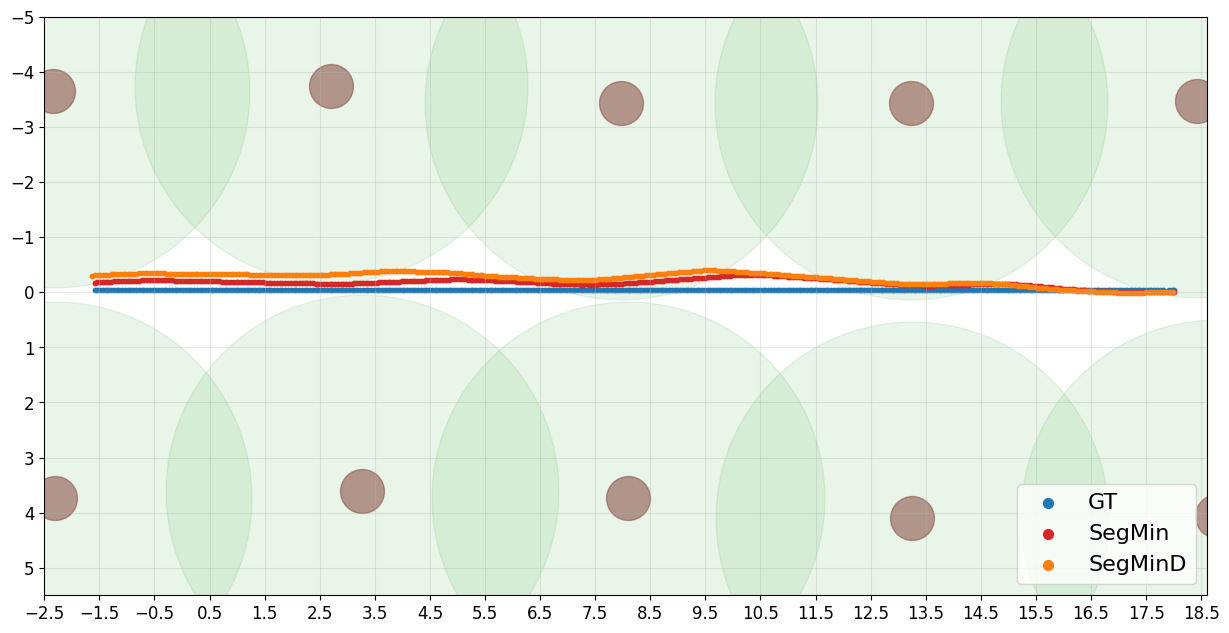

In [12]:
plt.gca().set_aspect('equal')
plt.rcParams['figure.figsize'] = [15, 15]

plt.scatter(coord['plants_row1'][:,1], coord['plants_row1'][:,0],
            c='tab:green', alpha=0.1, s=8e4, facecolors='tab:green')
plt.scatter(coord['plants_row2'][:,1], coord['plants_row2'][:,0],
            c='tab:green', alpha=0.1, s=8e4, facecolors='tab:green')

plt.scatter(coord['plants_row1'][:,1], coord['plants_row1'][:,0],
            c='tab:brown', alpha=0.6, s=1e3)
plt.scatter(coord['plants_row2'][:,1], coord['plants_row2'][:,0],
            c='tab:brown', alpha=0.6, s=1e3)

plt.scatter(traj[0,:,1], m, c='tab:blue', s=10, alpha=1, label='GT')
plt.scatter(traj[0,:,1], traj[0,:,0], c='tab:red', s=10, alpha=1, label='SegMin')
plt.scatter(traj[1,:,1], traj[1,:,0], c='tab:orange', s=10, alpha=1, label='SegMinD')

plt.xlim(-2.5, 18.6)
plt.ylim(-5, 5.5)
plt.xticks(np.arange(-2.5, 18.6, step=1), fontsize=12)
plt.yticks(np.arange(-5, 5.5, step=1), fontsize=12)

plt.gca().invert_yaxis()

plt.grid(alpha=0.3, which='both')
lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=16)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

plt.savefig('trajectories.pdf', bbox_inches='tight')
plt.show()

In [3]:
t1 = np.load(test_2[0])[:-1,:-1]
t2 = np.load(test_2[1])[:,:-1]
traj = np.stack((t1,t2))

In [4]:
mean = (coord['plants_row3'] + coord['plants_row4']) / 2

In [5]:
m = np.interp(traj[0,:,1], mean[:,1], mean[:,0])

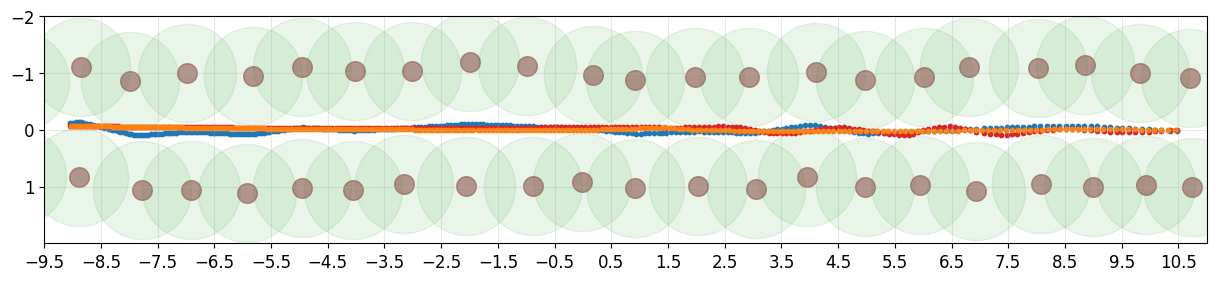

In [7]:
plt.gca().set_aspect('equal')
plt.rcParams['figure.figsize'] = [15, 15]

plt.scatter(coord['plants_row3'][:,1], coord['plants_row3'][:,0],
            c='tab:green', alpha=0.1, s=5e3, facecolors='tab:green')
plt.scatter(coord['plants_row4'][:,1], coord['plants_row4'][:,0],
            c='tab:green', alpha=0.1, s=5e3, facecolors='tab:green')

plt.scatter(coord['plants_row3'][:,1], coord['plants_row3'][:,0],
            c='tab:brown', alpha=0.6, s=2e2)
plt.scatter(coord['plants_row4'][:,1], coord['plants_row4'][:,0],
            c='tab:brown', alpha=0.6, s=2e2)

plt.scatter(traj[0,:,1], m, c='tab:blue', s=10, alpha=1, label='GT')
plt.scatter(traj[0,:,1], traj[0,:,0], c='tab:red', s=10, alpha=1, label='SegMin')
plt.scatter(traj[1,:,1], traj[1,:,0], c='tab:orange', s=10, alpha=1, label='SegMinD')

plt.xlim(-9.5, 11)
plt.ylim(-2, 2)
plt.xticks(np.arange(-9.5, 11, step=1), fontsize=12)
plt.yticks(np.arange(-2, 2, step=1), fontsize=12)

plt.gca().invert_yaxis()

plt.grid(alpha=0.3, which='both')
#lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=16)
#lgnd.legendHandles[0]._sizes = [50]
#lgnd.legendHandles[1]._sizes = [50]
#lgnd.legendHandles[2]._sizes = [50]

plt.savefig('trajectories_2.pdf', bbox_inches='tight')
plt.show()